In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
df = pd.read_csv("Obesity Classification.csv")
print(df.shape)
print(df)


(108, 7)
      ID  Age  Gender  Height  Weight   BMI          Label
0      1   25    Male     175      80  25.3  Normal Weight
1      2   30  Female     160      60  22.5  Normal Weight
2      3   35    Male     180      90  27.3     Overweight
3      4   40  Female     150      50  20.0    Underweight
4      5   45    Male     190     100  31.2          Obese
..   ...  ...     ...     ...     ...   ...            ...
103  106   11    Male     175      10   3.9    Underweight
104  107   16  Female     160      10   3.9    Underweight
105  108   21    Male     180      15   5.6    Underweight
106  109   26  Female     150      15   5.6    Underweight
107  110   31    Male     190      20   8.3    Underweight

[108 rows x 7 columns]


In [4]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
print(df)

      ID  Age  Gender  Height  Weight   BMI          Label
0      1   25       1     175      80  25.3  Normal Weight
1      2   30       0     160      60  22.5  Normal Weight
2      3   35       1     180      90  27.3     Overweight
3      4   40       0     150      50  20.0    Underweight
4      5   45       1     190     100  31.2          Obese
..   ...  ...     ...     ...     ...   ...            ...
103  106   11       1     175      10   3.9    Underweight
104  107   16       0     160      10   3.9    Underweight
105  108   21       1     180      15   5.6    Underweight
106  109   26       0     150      15   5.6    Underweight
107  110   31       1     190      20   8.3    Underweight

[108 rows x 7 columns]


In [5]:
df['Label'] = df['Label'].map({'Normal Weight': 0, 'Overweight': 1,'Underweight': 2,'Obese': 3})
print(df)

      ID  Age  Gender  Height  Weight   BMI  Label
0      1   25       1     175      80  25.3      0
1      2   30       0     160      60  22.5      0
2      3   35       1     180      90  27.3      1
3      4   40       0     150      50  20.0      2
4      5   45       1     190     100  31.2      3
..   ...  ...     ...     ...     ...   ...    ...
103  106   11       1     175      10   3.9      2
104  107   16       0     160      10   3.9      2
105  108   21       1     180      15   5.6      2
106  109   26       0     150      15   5.6      2
107  110   31       1     190      20   8.3      2

[108 rows x 7 columns]


In [8]:
df = df.drop('Label', axis=1)

KeyError: "['Label'] not found in axis"

In [9]:
del df['Label']

KeyError: 'Label'

In [10]:
print(df)

      ID  Age  Gender  Height  Weight   BMI
0      1   25       1     175      80  25.3
1      2   30       0     160      60  22.5
2      3   35       1     180      90  27.3
3      4   40       0     150      50  20.0
4      5   45       1     190     100  31.2
..   ...  ...     ...     ...     ...   ...
103  106   11       1     175      10   3.9
104  107   16       0     160      10   3.9
105  108   21       1     180      15   5.6
106  109   26       0     150      15   5.6
107  110   31       1     190      20   8.3

[108 rows x 6 columns]


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,108.0,56.046296,31.917939,1.0,28.75,56.5,83.25,110.0
Age,108.0,46.555556,24.720620,11.0,27.00,42.5,59.25,112.0
Gender,108.0,0.518519,0.501986,0.0,0.00,1.0,1.00,1.0
Height,108.0,166.574074,27.873615,120.0,140.00,175.0,190.00,210.0
Weight,108.0,59.490741,28.856233,10.0,35.00,55.0,85.00,120.0
BMI,108.0,20.549074,7.583818,3.9,16.70,21.2,26.10,37.2


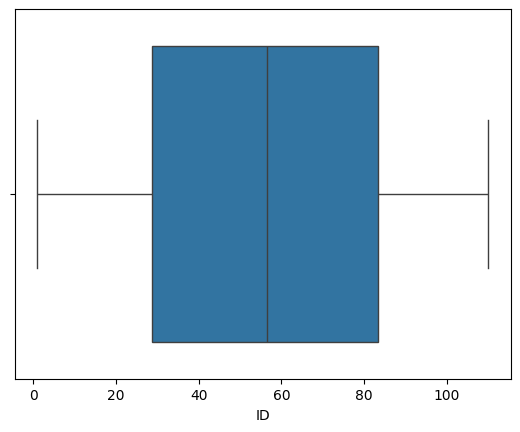

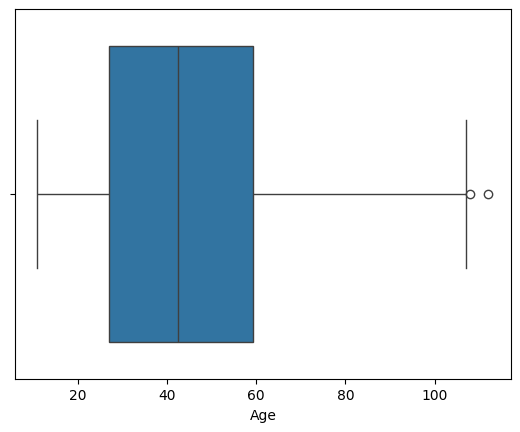

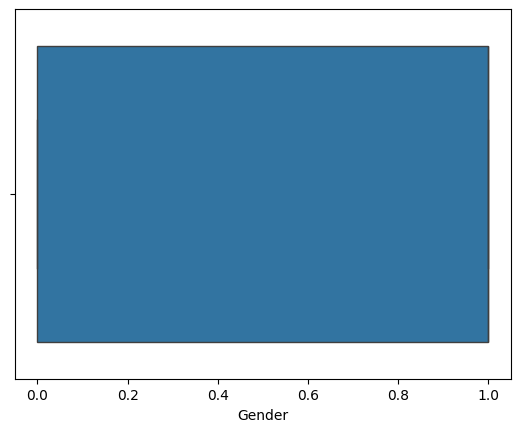

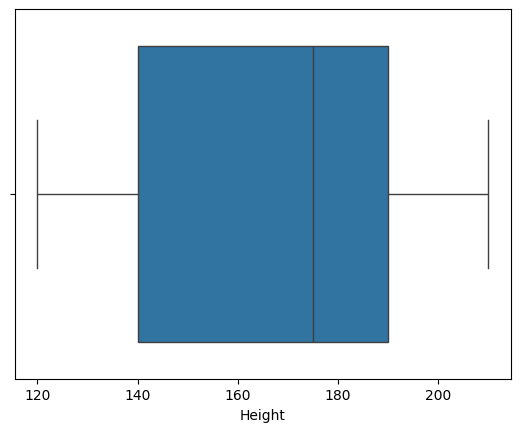

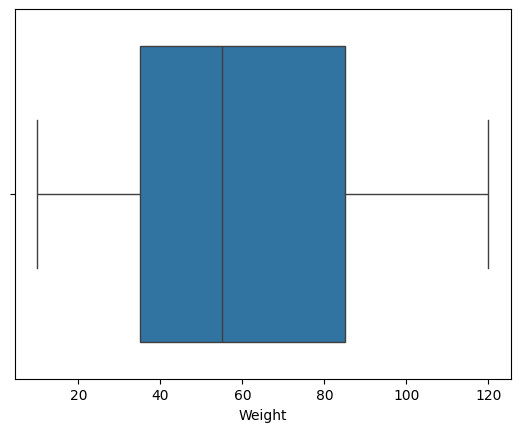

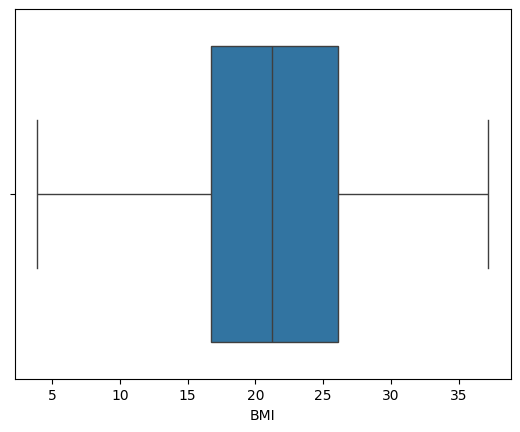

In [14]:
for i in df.columns:
    sns.boxplot(data = df,x=i)
    plt.show()

In [18]:
df.iloc[4,3] = 175

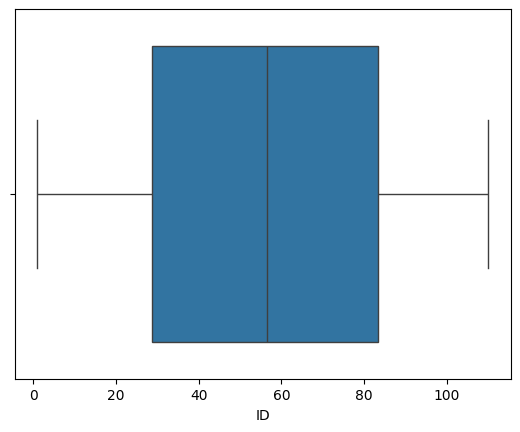

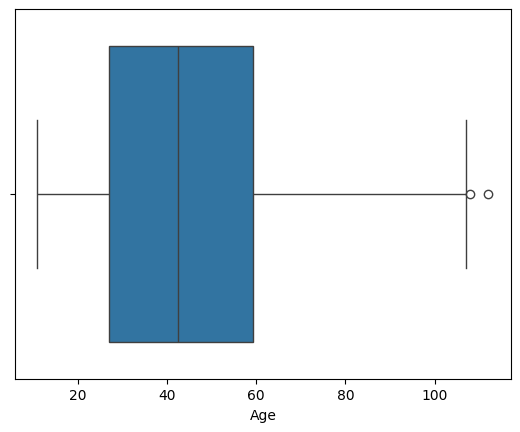

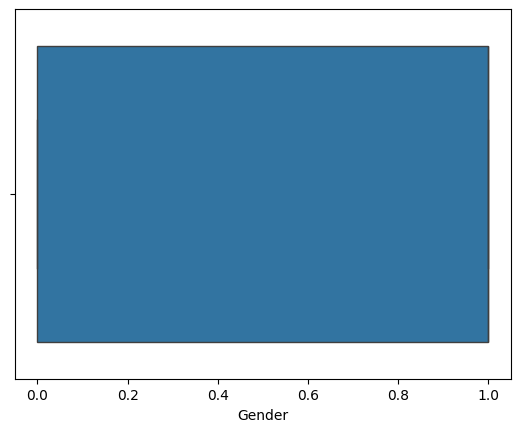

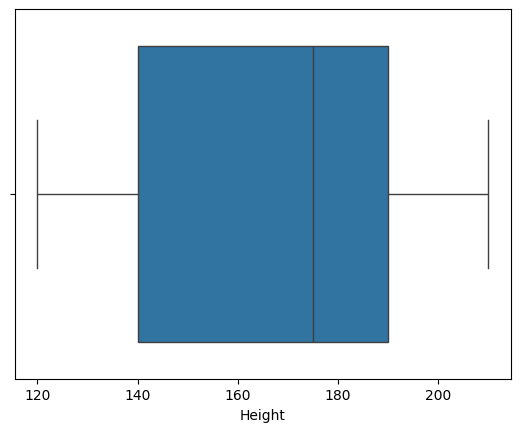

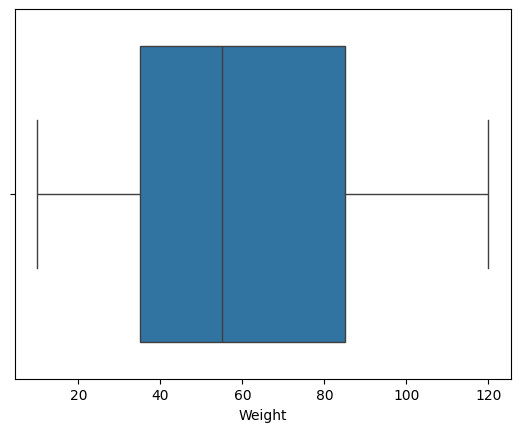

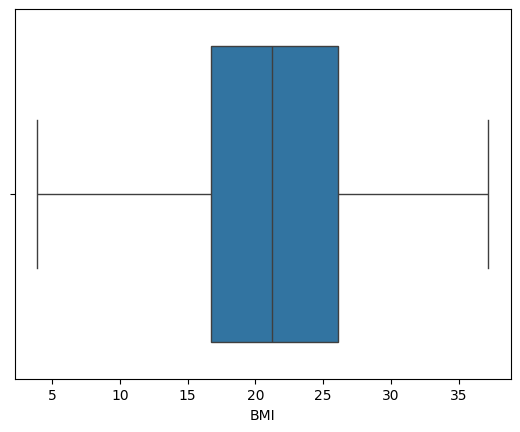

In [19]:
for i in df.columns:
    sns.boxplot(data = df,x=i)
    plt.show()

In [23]:
def wisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3-q1
    lw = q1-(1.5*iqr)
    uw = q3+(1.5*iqr)
    return lw,uw
print(wisker(df['Height']))

(np.float64(65.0), np.float64(265.0))


In [24]:
df = df[df['Age'] <= 100]


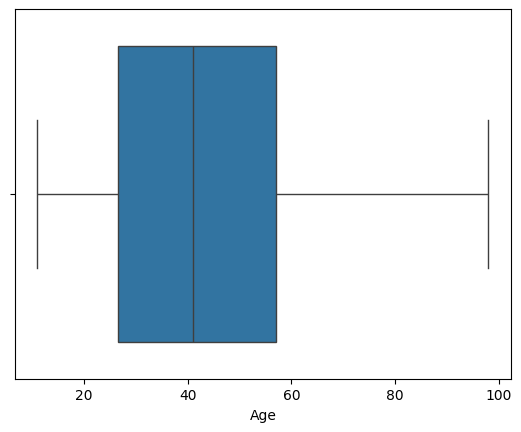

In [27]:
sns.boxplot(data = df,x='Age')
plt.show()

In [28]:
scaler = StandardScaler()
df[['Age','Height','Weight','BMI']] = scaler.fit_transform(df[['Age','Height','Weight','BMI']])
print(df)

      ID       Age  Gender    Height    Weight       BMI
0      1 -0.877326       1  0.307808  0.769820  0.677998
1      2 -0.642124       0 -0.251679  0.058686  0.300882
2      3 -0.406922       1  0.494304  1.125386  0.947366
3      4 -0.171720       0 -0.624670 -0.296881 -0.035829
4      5  0.063482       1  0.307808  1.480953  1.472634
..   ...       ...     ...       ...       ...       ...
103  106 -1.535891       1  0.307808 -1.719149 -2.204244
104  107 -1.300689       0 -0.251679 -1.719149 -2.204244
105  108 -1.065487       1  0.494304 -1.541365 -1.975281
106  109 -0.830286       0 -0.624670 -1.541365 -1.975281
107  110 -0.595084       1  0.867295 -1.363582 -1.611634

[103 rows x 6 columns]


C:\Users\S VARUNESH\AppData\Local\Temp\ipykernel_7096\1215661400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Age','Height','Weight','BMI']] = scaler.fit_transform(df[['Age','Height','Weight','BMI']])


In [29]:
fd = pd.read_csv("Obesity Classification.csv")
Y = fd['Label']
Y['Label'] = Y['Label'].map({'Normal Weight': 0, 'Overweight': 1,'Underweight': 2,'Obese': 3})

KeyError: 'Label'

In [35]:
fd = pd.read_csv("Obesity Classification.csv")
fd = fd[fd['Age'] <= 100]
Y = fd['Label']
Y = Y.map({'Normal Weight': 0, 'Overweight': 1,'Underweight': 2,'Obese': 3})

In [31]:
print(Y)

0      0
1      0
2      1
3      2
4      3
      ..
103    2
104    2
105    2
106    2
107    2
Name: Label, Length: 108, dtype: int64


In [36]:
X = df.drop('ID',axis = 1)
print(X)

          Age  Gender    Height    Weight       BMI
0   -0.877326       1  0.307808  0.769820  0.677998
1   -0.642124       0 -0.251679  0.058686  0.300882
2   -0.406922       1  0.494304  1.125386  0.947366
3   -0.171720       0 -0.624670 -0.296881 -0.035829
4    0.063482       1  0.307808  1.480953  1.472634
..        ...     ...       ...       ...       ...
103 -1.535891       1  0.307808 -1.719149 -2.204244
104 -1.300689       0 -0.251679 -1.719149 -2.204244
105 -1.065487       1  0.494304 -1.541365 -1.975281
106 -0.830286       0 -0.624670 -1.541365 -1.975281
107 -0.595084       1  0.867295 -1.363582 -1.611634

[103 rows x 5 columns]


In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.6, random_state=42, stratify=Y
)

In [59]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=100,   
    max_depth=None,     
    random_state=42
)



In [60]:
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [61]:
y_pred = model.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9193548387096774


[[14  3  0  0]
 [ 0 11  0  0]
 [ 0  0 28  0]
 [ 0  2  0  4]]


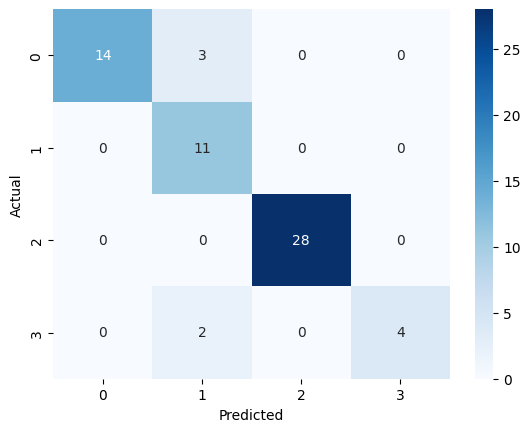

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.69      1.00      0.81        11
           2       1.00      1.00      1.00        28
           3       1.00      0.67      0.80         6

    accuracy                           0.92        62
   macro avg       0.92      0.87      0.88        62
weighted avg       0.94      0.92      0.92        62

